## 05.29

- definir API para realizar un experimento
    # En un experimento se puede configurar
    # - el grafo del sistema
    # - la funcion de como actualizan los agentes su precio
    # - el numero de pasos de la simulacion
    # - las metricas para evaluar sobre el grafo en cada paso

#### To Do

- [ ] Integrar la funcion de update
- [ ] Definir como integrar sobre que nodos iterar en cada step
- [ ] Definir metodo para guardar los resultados del experimento 

In [6]:
# mantener los imports siempre arriba
from networkx import DiGraph
from networkx.drawing import draw

In [11]:
grafo = DiGraph({"a":["b","c"], "b":["e"],"c":["d"],"d":["b"]})

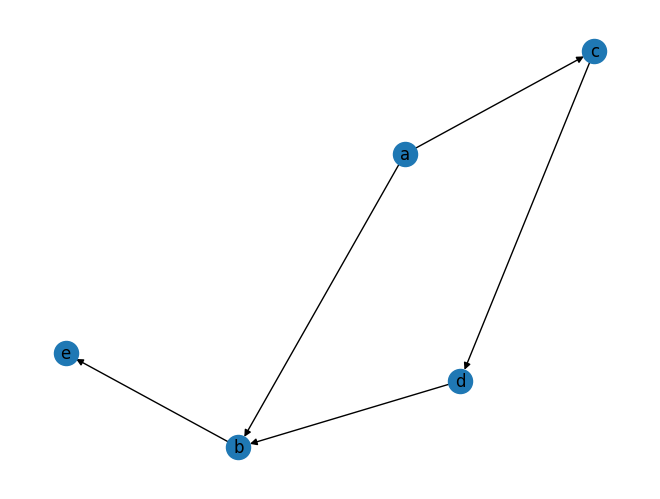

In [12]:
draw(grafo, with_labels=True)

In [37]:

class Experimento:

    def __init__(self, grafo, funcion_de_update, metricas=None):
        self.grafo = grafo
        self.update = funcion_de_update
        self.metricas = metricas or {}
        self._curr_step = 0
        self._metricas_evaluadas = {nombre:[] for nombre in self.metricas}

    def step(self, n=1):
        for _ in range(n):
            self._single_step()
            self._calcular_metricas()
            self._curr_step += 1

    def _single_step(self):
        # evaluar la funcion de update sobre los nodos
        pass

    def _calcular_metricas(self):
        for nombre, metrica in self.metricas.items():
            self._metricas_evaluadas[nombre].append(metrica(self.grafo))

    def __str__(self):
        return str(self.to_dict())
    
    def __repr__(self):
        return str(self)
    
    def to_dict(self):
        return {"id_grafo": hash(self.grafo), "step": self._curr_step, "metricas": self._metricas_evaluadas}

In [38]:
def ejemplo_de_update(nodo, inflacion=0.0):
    nodo.precio *= 1.1 # aumenta el 10%
    return nodo.precio

In [39]:
def update_de_debugging(nodo, inflacion=0.0):
    print(nodo)

In [40]:
experimento = Experimento(grafo,update_de_debugging)
experimento

{'id_grafo': 126960031652, 'step': 0, 'metricas': {}}

In [41]:
experimento.step()

In [42]:
experimento

{'id_grafo': 126960031652, 'step': 1, 'metricas': {}}

In [43]:
def contar_nodos(grafo):
    return len(grafo)

metricas = {"cuenta":contar_nodos}
experimento_con_metricas = Experimento(grafo,update_de_debugging, metricas)
experimento_con_metricas.step(3)
experimento_con_metricas

{'id_grafo': 126960031652, 'step': 3, 'metricas': {'cuenta': [5, 5, 5]}}